# A Deep Neural Network Regressor

My first stab at this task will be to implement an **DNN Regressor** model.

In [1]:
%matplotlib inline

#Basic Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Sklearn Imports
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('train.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1559,1560,1561,1562,1563,1564,1565,1566,1567,1568
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40824 entries, 0 to 40823
Columns: 1569 entries, 0 to 1568
dtypes: float64(1569)
memory usage: 488.7 MB


In [4]:
# Data load function
def load_data(filename):
    data   = pd.read_csv(filename,header=None)
    x_data = data.iloc[:,:-1].values
    y_data = data.iloc[:,-1].values
#     print 'X shape:', x_data.shape
#     print 'Y shape:', y_data.shape
    return x_data,y_data

In [5]:
filename = 'train.csv'
x_train,y_train=load_data(filename)
x_train,x_valid,y_train,y_valid = train_test_split(x_train,y_train,test_size=0.3,random_state=32)

## Regressor Model

In [6]:
# Keras Imports
# Keras Imports
from keras.models import Model, load_model
from keras.layers import Input, Dense, Lambda
from keras.layers import Flatten, Reshape, GaussianDropout
from keras import backend as K
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [7]:
# Parameters
ndim = x_train.shape[1]
L1   = 320
L2   = 256
L3   = 100
L4   = 32

In [8]:
# Build Autoencoder
def build_model():
    x = Input(shape=(ndim,),name='Input')
    h = Dense(L1,activation='relu',name='L1')(x)
    h = Dense(L2,activation='relu',name='L2')(h)
    h = Dense(L3,activation='relu',name='L3')(h)
    h = Dense(L4,activation='relu',name='L4')(h)
    y = Dense(1,activation='linear',name='Output')(h)
    model = Model(x,y)
    return model

In [9]:
# Compile Model
model = build_model()
model.summary()
model.compile(optimizer='adam',loss='mean_squared_error')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           (None, 1568)              0         
_________________________________________________________________
L1 (Dense)                   (None, 320)               502080    
_________________________________________________________________
L2 (Dense)                   (None, 256)               82176     
_________________________________________________________________
L3 (Dense)                   (None, 100)               25700     
_________________________________________________________________
L4 (Dense)                   (None, 32)                3232      
_________________________________________________________________
Output (Dense)               (None, 1)                 33        
Total params: 613,221
Trainable params: 613,221
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Train Model
log = model.fit(x_train, y_train,
              batch_size=30,
              epochs=30,
              shuffle=True,
              validation_data=(x_valid,y_valid))

Train on 28576 samples, validate on 12248 samples
Epoch 1/30
28576/28576 [==============================] - 2s - loss: 1.2044 - val_loss: 0.9336
Epoch 2/30
28576/28576 [==============================] - 2s - loss: 0.1187 - val_loss: 0.1962
Epoch 3/30
28576/28576 [==============================] - 2s - loss: 0.0046 - val_loss: 8.4879e-04
Epoch 4/30
28576/28576 [==============================] - 2s - loss: 0.2102 - val_loss: 0.0011
Epoch 5/30
28576/28576 [==============================] - 2s - loss: 7.0552e-04 - val_loss: 3.1897e-04
Epoch 6/30
28576/28576 [==============================] - 2s - loss: 5.5020e-04 - val_loss: 4.4337e-04
Epoch 7/30
28576/28576 [==============================] - 2s - loss: 5.7542e-04 - val_loss: 1.1779e-04
Epoch 8/30
28576/28576 [==============================] - 2s - loss: 9.0720e-04 - val_loss: 2.0162e-04
Epoch 9/30
28576/28576 [==============================] - 2s - loss: 0.0011 - val_loss: 4.4330e-05
Epoch 10/30
28576/28576 [==============================

In [13]:
model.save('model.h5')

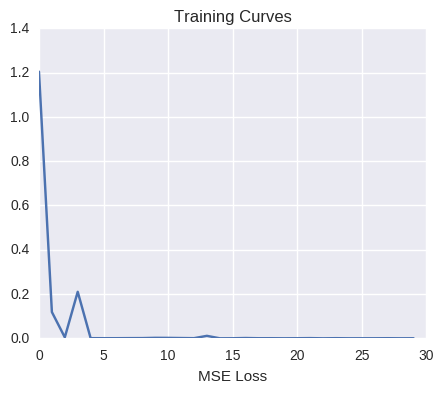

In [11]:
# Training Curves
plt.figure(figsize=(5,4))
plt.plot(log.epoch,log.history['loss'])
# plt.plot(log.epoch,log.history['val_loss'],'g')
plt.title('Training Curves')
plt.xlabel('Epochs')
plt.xlabel('MSE Loss')
# plt.legend(['Train','Valid'])

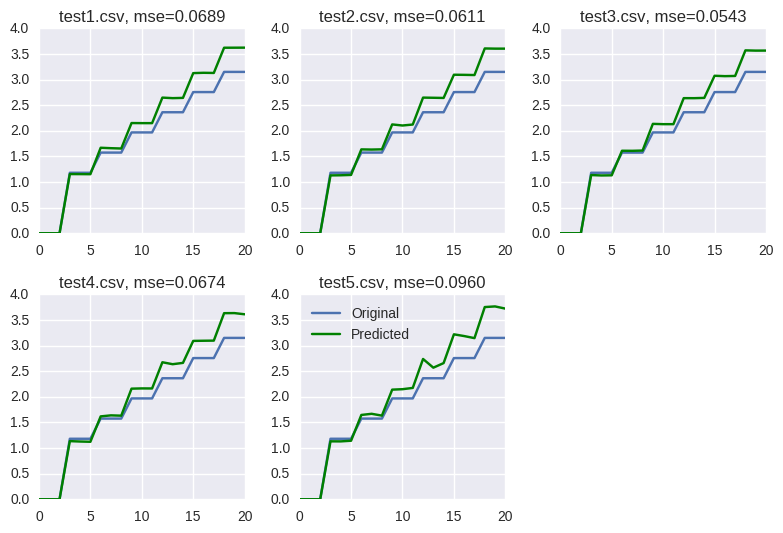

In [14]:
# Generate Predictions for Test Set
for i in range(5):
    fname = 'test{}.csv'.format(i+1) 
    x_test,y_test=load_data(fname)
    y_predict = model.predict(x_test)
    loss = model.evaluate(x_test,y_test,verbose=0)
    
    plt.subplot(231+i)
    plt.plot(y_test)
    plt.plot(y_predict,'g')
    header = '{0}, mse={1:.04f}'.format(fname,loss)
    plt.title(header)
    
    oname = 'ypred{}.csv'.format(i+1)
    tname = 'ytest{}.csv'.format(i+1)
    np.savetxt(oname,y_predict,delimiter=',')
    np.savetxt(tname,y_test,delimiter=',')
    
plt.legend(['Original','Predicted'],loc=2)
plt.tight_layout()

----